I loaded the NYC Neighborhood Tabulation Areas (NTA) dataset along with my personal Resy restaurant reservation location data. To focus the analysis, I filtered the NTAs to only include the boroughs of Manhattan and Brooklyn. This homework allows me to examine which neighborhoods in these boroughs I visit more frequently based on my reservation history.

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [50]:
nta_gdf = gpd.read_file('/Users/sunni/Desktop/Mapping System/Geoprocessing/nta.geojson') 
nta_gdf.columns

Index(['shape_area', 'ntaname', 'cdtaname', 'shape_leng', 'boroname',
       'ntatype', 'nta2020', 'borocode', 'countyfips', 'ntaabbrev', 'cdta2020',
       'geometry'],
      dtype='object')

In [51]:
print(nta_gdf['boroname'].unique())

['Brooklyn' 'Bronx' 'Manhattan' 'Queens' 'Staten Island']


In [52]:
man_brooklyn_gdf = nta_gdf[nta_gdf['boroname'].isin(['Manhattan', 'Brooklyn'])]
print(man_brooklyn_gdf)

        shape_area                     ntaname  \
0    35321809.1041                  Greenpoint   
1    28852852.7038                Williamsburg   
2    15208960.7339          South Williamsburg   
3    52267407.9898           East Williamsburg   
4    9982321.59069            Brooklyn Heights   
..             ...                         ...   
151  24773510.6301  Washington Heights (North)   
152  14437615.8767                      Inwood   
153   7750592.2391             Highbridge Park   
154  10007466.8968            Inwood Hill Park   
155   38312378.818                Central Park   

                                              cdtaname     shape_leng  \
0       BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28919.5608108   
1       BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28134.0823238   
2       BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  18250.2805432   
3       BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  43184.7989883   
4    BK02 Downtown Brooklyn-Fort G

In [53]:
resy_gdf = gpd.read_file('/Users/sunni/Desktop/Mapping System/Geoprocessing/resy_reservations.geojson') 
resy_gdf = gpd.GeoDataFrame(resy_df, geometry='geometry', crs='EPSG:4326')
resy_gdf = resy_gdf.to_crs(nta_gdf.crs)

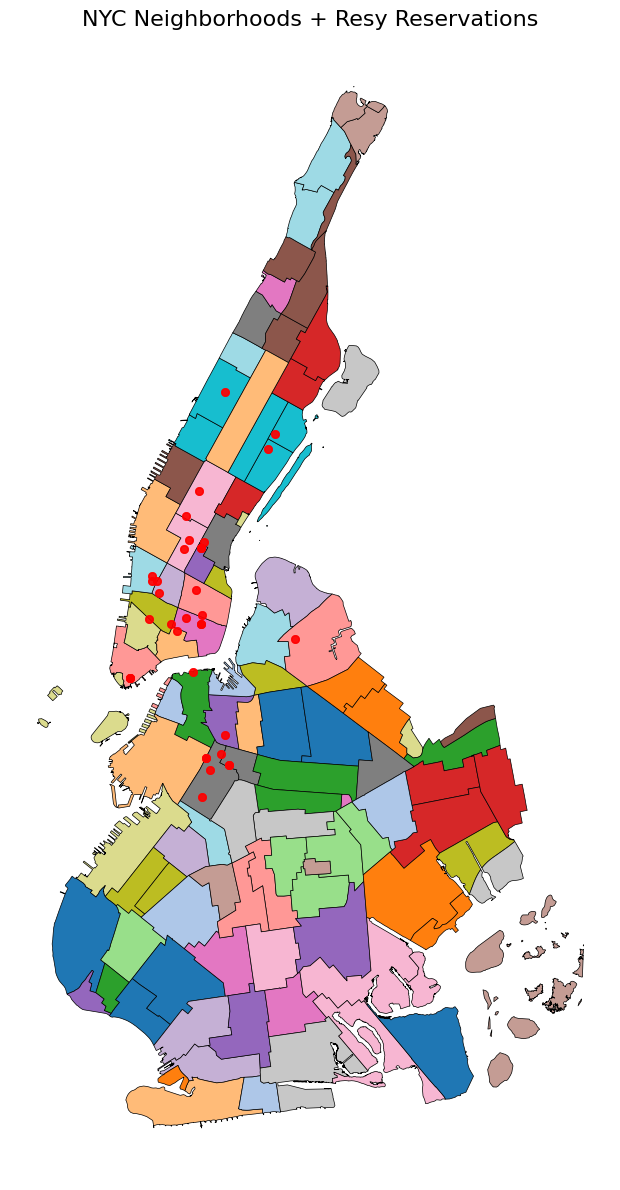

In [55]:
fig, ax = plt.subplots(figsize=(12, 12))
man_brooklyn_gdf.plot(column='ntaname', ax=ax, cmap='tab20', linewidth=0.5, edgecolor='black', legend=False)


resy_gdf.plot(ax=ax, color='red', markersize=30, alpha=0.7)

ax.set_title("NYC Neighborhoods + Resy Reservations", fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()